# モータ制御を試してみよう

ここでは、AKARIでモータ制御をするサンプルを動かしながら、プログラムの書き方を説明します。

## 1. ライブラリのインポートとインスタンスの作成
まずは、モータ制御に使うakari_clientライブラリのインポートをして、AkariClientのインスタンスを作成します。  
この作業を行うことで、モータ制御のための関数を使うことができるようになります。  
importするのは、AkariClientというライブラリです。これは、下記のコマンドでインポートできます。  
 ```python
 #AkariClientのインポート
 from akari_client import AkariClient
 ```  
また、このライブラリを用いて、AkariClientのインスタンスと、関節制御用のインスタンスを取得する必要があります。  
 ```python
 #AkariClient、jointsのインスタンスを取得
 akari = AkariClient()  
 joints = akari.joints
 ```
まだpythonに詳しくない方は、とりあえず **モータを動かしたい場合はこのコマンドを実行する必要がある** と覚えておけばOKです。
次のウインドウを実行して、ライブラリのインポートとインスタンスの作成を行っておきましょう。
また、ここではあらかじめサーボの速度を5rad/sに変更しておきます。これについては、後ほど使い方を説明します。

In [ ]:
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints

# サーボの速度を5rad/sに変更(後ほど説明)
joints.set_joint_velocities(pan=5,tilt=5)

## 2. サーボのON、OFFをしてみよう
まずはヘッドのサーボモータのON、OFFをしてみましょう。
サーボのON,OFFには、_set_servo_enabled()_ を使います。
```python
    AkaliClient::JointManager::set_servo_enabled(  
        pan: Optional[bool] = None,  
        tilt: Optional[bool] = None,
    ) -> None:
```
> サーボのON,OFFを設定する。pan,tiltの軸ごとにTrueならサーボON、FalseならサーボOFFとなる。

下記のセルを実行すると、panのサーボがOFF、tilt(上下方向)のサーボがONになります。  
外から手でAKARIのヘッドを押してみると、左右には手で動かせ、上下はロックされているのがわかると思います。

In [ ]:
#panのサーボをOFF、tiltのサーボをONにする。
joints.set_servo_enabled(pan=False, tilt=True)

### 練習問題1
上記の状態から、panのサーボだけをONにしてみましょう。  
Tiltは現在の状態をそのまま維持させましょう。

In [ ]:
#ここに答えを記述


#### 答え

In [ ]:
# panのサーボのみONにする。
# pan,tiltの指定は一方のみでも可能
joints.set_servo_enabled(pan=True)

## 3. サーボを動かそう
次にヘッドのサーボを動かしてみましょう。  
ヘッドを動かすには、_move_joint_positions()_　を使います。  
```python
    AkaliClient::JointManager::move_joint_positions(
        pan: Optional[float] = None,
        tilt: Optional[float] = None
    ) -> None:
```
> サーボの移動する角度を指定して移動する。単位は[rad]

下記のセルを実行すると、panのサーボが0.3rad、tiltのサーボが0.5radの方向を向きます。  

In [ ]:
#pan、tiltのサーボをONにする。
joints.set_servo_enabled(pan=True, tilt=True)
#panのサーボを0.3rad、tiltのサーボを0.5rad移動する。
joints.move_joint_positions(pan=0.3, tilt=0.5)

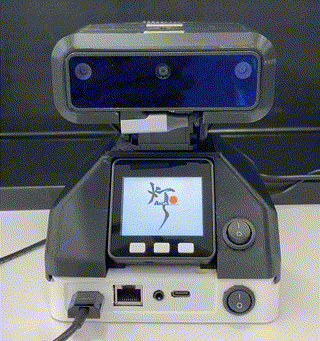

In [3]:
from IPython.display import Image
Image('tutorial_motor_3.gif')

初期位置に戻すには、下記のセルのように両方0radを指定すればOKです。

In [ ]:
#pan、tiltのサーボを0radに移動する。
joints.move_joint_positions(pan=0, tilt=0)

### 練習問題2
tiltを0.3rad下に向かせる→2秒待つ→tiltを0.3rad上に向かせる、というおじぎモーションを作ってみましょう。  
2秒待つ部分はすでにtime.sleepを使って書いてあるので、下を向く行と上を向く行を書けばOKです。

In [ ]:
import time
# panを0rad、tiltを0.2radにしておく
joints.move_joint_positions(pan=0, tilt=0.2)
# 1秒待つ
time.sleep(1)
##### 以下問題 ####
# tiltを0.3rad下にするコードを以下に記述

# 2秒待つ
time.sleep(2)
# tiltを0.3rad上にするコードを以下に記述


#### 答え

In [ ]:
import time
# panを0rad、tiltを0.2radにしておく
joints.move_joint_positions(pan=0, tilt=0.2)
# 1秒待つ
time.sleep(1)
##### 以下問題 ####
# tiltを0.3rad下にするコードを以下に記述
joints.move_joint_positions(tilt=-0.3)
# 2秒待つ
time.sleep(2)
# tiltを0.3rad上にするコードを以下に記述
joints.move_joint_positions(tilt=0.3)

## 4. サーボの速度、加速度を変更しよう
次にヘッドのサーボの目標動作速度、加速度を変更してみましょう。  
速度を変更するには、_set_joint_velocities()_　を使います。  
```python
    AkaliClient::JointManager::set_joint_velocities(
        pan: Optional[float] = None,
        tilt: Optional[float] = None
    ) -> None:
```
> サーボの速度を指定する。単位は[rad/s]  

この関数を先に呼んでから　_move_joint_positions()_　を実行すると、指定した速度で動くようになります。  
下記のセルを実行すると、8rad/sで動いた後に、3rad/sで初期位置に戻ります。速度の変化が分かると思います。

In [ ]:
import time

#pan、tiltのサーボをONにする。
joints.set_servo_enabled(pan=True, tilt=True)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)
# 1秒待つ
time.sleep(1)

# サーボの速度を8rad/sに変更
joints.set_joint_velocities(pan=8,tilt=8)
#panのサーボを0.3rad、tiltのサーボを0.5rad移動する。
joints.move_joint_positions(pan=0.3, tilt=0.5)
# 1秒待つ
time.sleep(1)
# サーボの速度を3rad/sに変更
joints.set_joint_velocities(pan=3,tilt=3)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)

加速度を変更するには、_set_joint_accelerations()_　を使います。  
```python
    AkaliClient::JointManager::set_joint_accelerations(
        pan: Optional[float] = None,
        tilt: Optional[float] = None
    ) -> None:
```
> サーボの速度を指定する。単位は[rad/s^2]  

この関数を先に呼んでから　_move_joint_positions()_　を実行すると、指定した加速度を目標値とし動くようになります。  
下記のセルを実行すると、速度はどちらも8rad/sですが、加速度0.01rad/s^2で動いて0.1rad/s^2で初期位置に戻ります。動き方の変化が分かると思います。

In [ ]:
import time

#pan、tiltのサーボをONにする。
joints.set_servo_enabled(pan=True, tilt=True)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)
# 1秒待つ
time.sleep(1)

# サーボの加速度を0.01rad/s^2に変更
joints.set_joint_accelerations(pan=0.01,tilt=0.01)
# サーボの速度を8rad/sに変更
joints.set_joint_velocities(pan=8,tilt=8)
#panのサーボを0.5rad、tiltのサーボを0.5rad移動する。
joints.move_joint_positions(pan=0.5, tilt=0.5)
# 3秒待つ
time.sleep(3)
# サーボの加速度を0.1rad/s^2に変更
joints.set_joint_accelerations(pan=0.1,tilt=0.1)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)

### 練習問題3
panの速度を7rad/s、加速度を0.1rad/s、tiltの速度を3rad/s、加速度を0.02rad/sに変更してみましょう。  
変更後は、pan0.7rad、tilt0.3radを向く→pan-0.7rad、tilt-0.3radを向く→初期位置に戻る、という動作をするようにセットしてあります。
移動する角度panとtiltで大きく違うものの、速度、加速度に差をつけたことにより同じくらいの時間で移動するようになるはずです。

In [ ]:
import time

##### 以下問題 ####
# pan、tiltの速度変更を記述

# pan、tiltの加速度変更を記述

##### 以上問題 ####

#panのサーボを0.7rad、tiltのサーボを0.3radに移動する。
joints.move_joint_positions(pan=0.7, tilt=0.3)
# 3秒待つ
time.sleep(3)
#panのサーボを-0.7rad、tiltのサーボを-0.3radに移動する。
joints.move_joint_positions(pan=-0.7, tilt=-0.3)
# 3秒待つ
time.sleep(3)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)

#### 答え

In [ ]:
import time

##### 以下問題 ####
# pan、tiltの加速度変更を記述
joints.set_joint_accelerations(pan=0.1,tilt=0.02)
# pan、tiltの速度変更を記述
joints.set_joint_velocities(pan=7,tilt=3)

##### 以上問題 ####

#panのサーボを0.7rad、tiltのサーボを0.3radに移動する。
joints.move_joint_positions(pan=0.7, tilt=0.3)
# 3秒待つ
time.sleep(3)
#panのサーボを-0.7rad、tiltのサーボを-0.3radに移動する。
joints.move_joint_positions(pan=-0.7, tilt=-0.3)
# 3秒待つ
time.sleep(3)
#初期位置に戻す。
joints.move_joint_positions(pan=0, tilt=0)

## 5. サーボの現在位置を取得しよう
最後に、サーボの現在位置を取得する方法を学習しましょう。
サーボ位置の取得には、 _get_joint_position()_ を使います。
```python
    AkaliClient::JointManager::get_joint_positions(
        void
      ) -> Dict[str, float]:
```
> 現在角度を取得する。単位は[rad]  

下記のセルを実行すると、サーボの現在位置を取得することができます。

In [ ]:
# 現在位置を取得して出力
pos = joints.get_joint_positions()
print(pos)

panのセルの値、tiltのセルの値のみ取得することも可能です。

In [ ]:
# 現在位置を取得して出力
pos=joints.get_joint_positions()
print("panの角度は" + str(pos['pan'])+"です。")

### 練習問題4
コメントの流れに従って穴埋めし、tiltの位置を-0.2radに移動して、現在のtiltの位置を「tiltの角度は〇〇radです。」と出力し、初期位置に戻しましょう。
モータの精度上、0.2radちょうどにはなりません。

In [ ]:
import time

### 以下問題
# tiltのサーボを-0.2radに移動する。

# 2秒停止

# 現在位置を取得して出力

# 2秒停止

#tiltのサーボを0radに移動する。


#### 答え

In [ ]:
import time

### 以下問題
# tiltのサーボを-0.2radに移動する。
joints.move_joint_positions(tilt=-0.2)
# 2秒停止
time.sleep(2)
# 現在位置を取得して出力
pos =joints.get_joint_positions()
print("tiltの角度は" + str(pos['tilt']) + "です。")
# 2秒停止
time.sleep(2)
#tiltのサーボを0radに移動する。
joints.move_joint_positions(tilt=-0)

## 最後に
以上でモータ制御のチュートリアルは終わりです。  
次はM5との通信について説明します。